In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline

In [2]:
# read the dataset from dir
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Supervised or Unsupervised
# ans: Supervised->target column
# Regreesion or classification
# ans: classification

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# independent feature->'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age'
# dependent feature-> outcome

# descriptive statistics of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# (row, columns)
df.shape

(768, 9)

In [8]:
# distribution of outcome variable
df.Outcome.value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [9]:
df['Outcome'].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

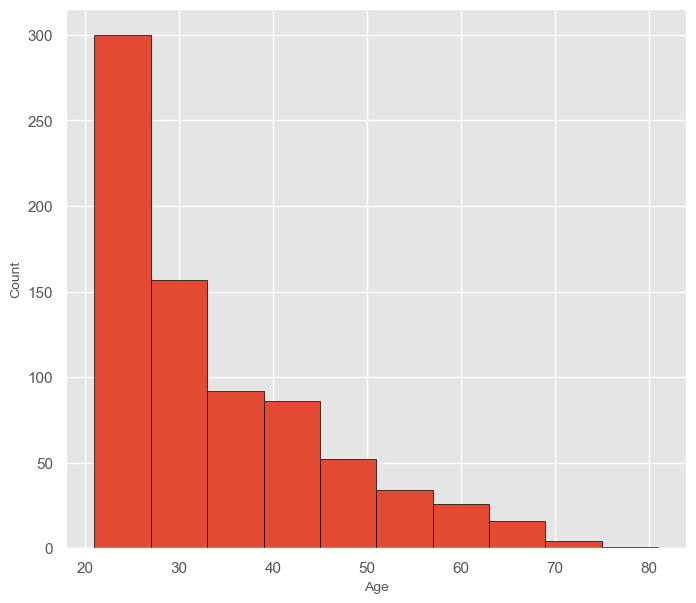

In [10]:
# plot the hist of the age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
df['Age'].hist(edgecolor="black")

In [11]:
df['Age'].max()

81

In [12]:
df['Age'].min()

21

In [13]:
print("MAX AGE: "+str(df['Age'].max()))
print("MIN AGE: "+str(df['Age'].min()))

MAX AGE: 81
MIN AGE: 21


In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Density'>

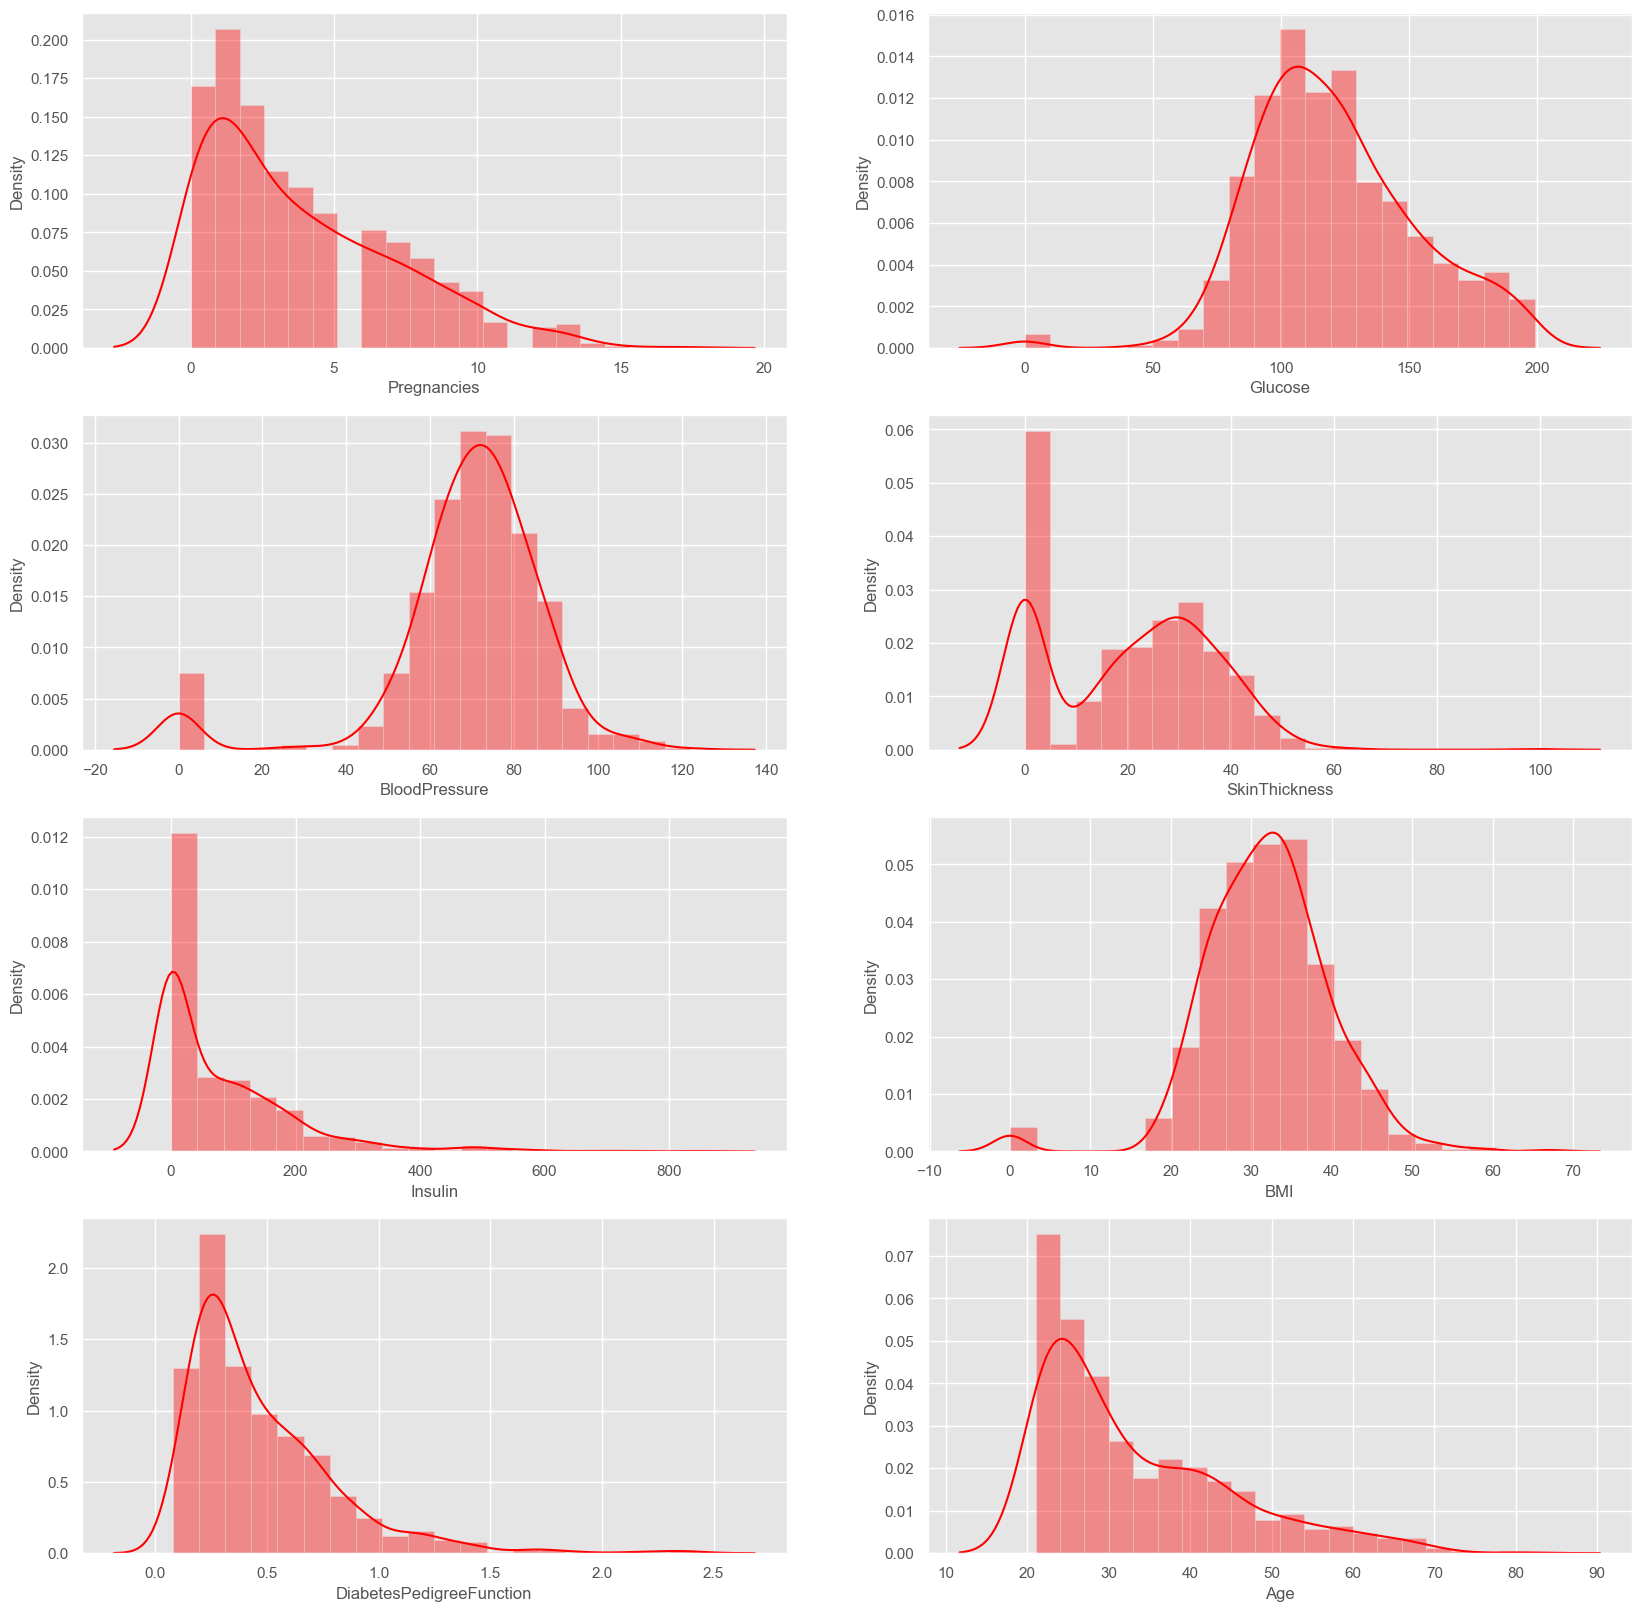

In [15]:
# density graph
# 4*2=8
# columns=2 figure
# having 4 row

# [0,0], [0,1]
# [1,0], [1,1]
# [2,0], [2,1]
# [3,0], [3,1]

fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="red")
sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="red")
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0], color="red")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color="red")
sns.distplot(df.Insulin, bins=20, ax=ax[2,0], color="red")
sns.distplot(df.BMI, bins=20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color="red")
sns.distplot(df.Age, bins=20, ax=ax[3,1], color="red")

In [16]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
df.groupby("Outcome").agg({'Pregnancies':'mean'})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [18]:
df.groupby("Outcome").agg({'Pregnancies':'max'})

,Pregnancies
Outcome,
0,13
1,17


In [19]:
df.groupby("Outcome").agg({'Glucose':'mean'})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [20]:
df.groupby("Outcome").agg({'Glucose':'max'})

,Glucose
Outcome,
0,197
1,199


In [21]:
# Homework
# 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age'
#     groupby-> mean/max

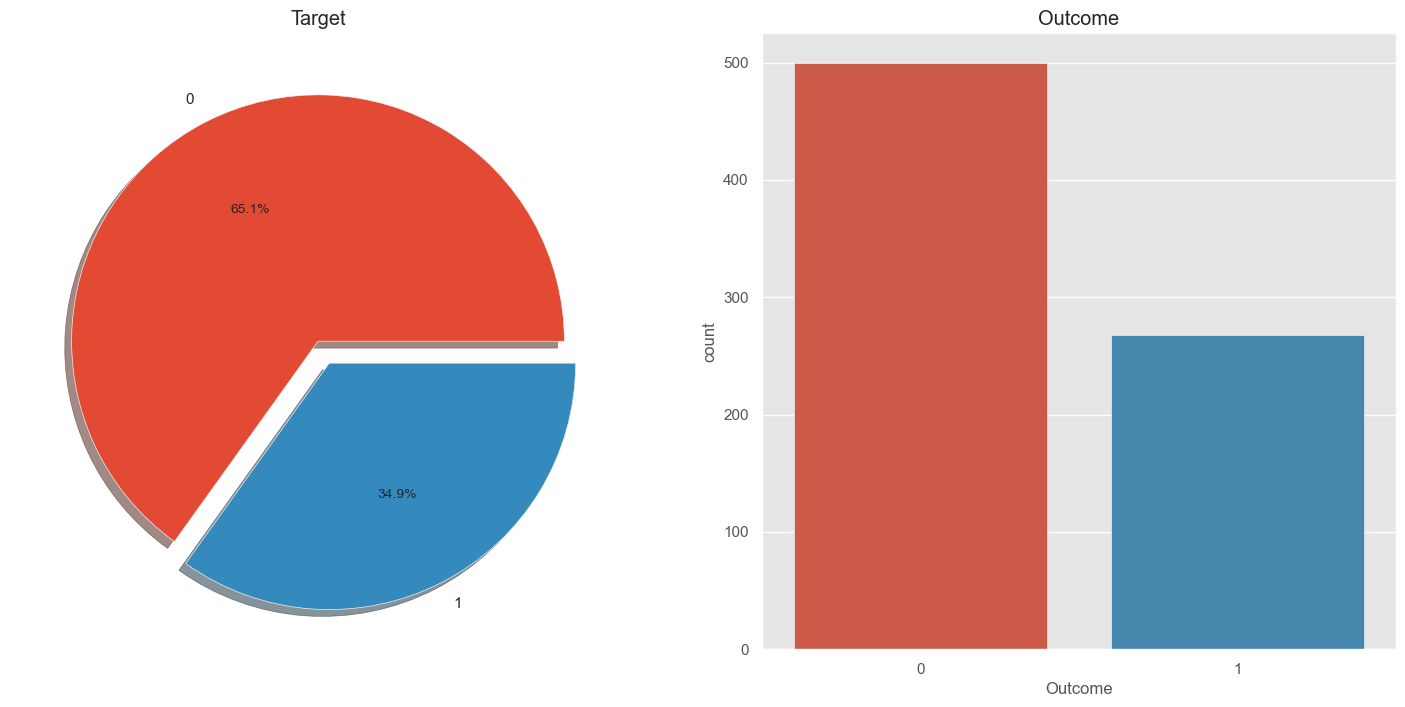

In [25]:
# 0>healthy
# 1>diabetes

f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Plotting the pie chart on the first subplot
df['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct="%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title('Target')
ax[0].set_ylabel('')

# Plotting the count plot on the second subplot
sns.countplot(x='Outcome', data=df, ax=ax[1])
ax[1].set_title('Outcome')

# Display the plots
plt.show()

In [23]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [30]:
# EDA Part Completed
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [31]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

In [32]:
# Data preprocessing Part
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [33]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [38]:
#median
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [39]:
#median
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [40]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [41]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

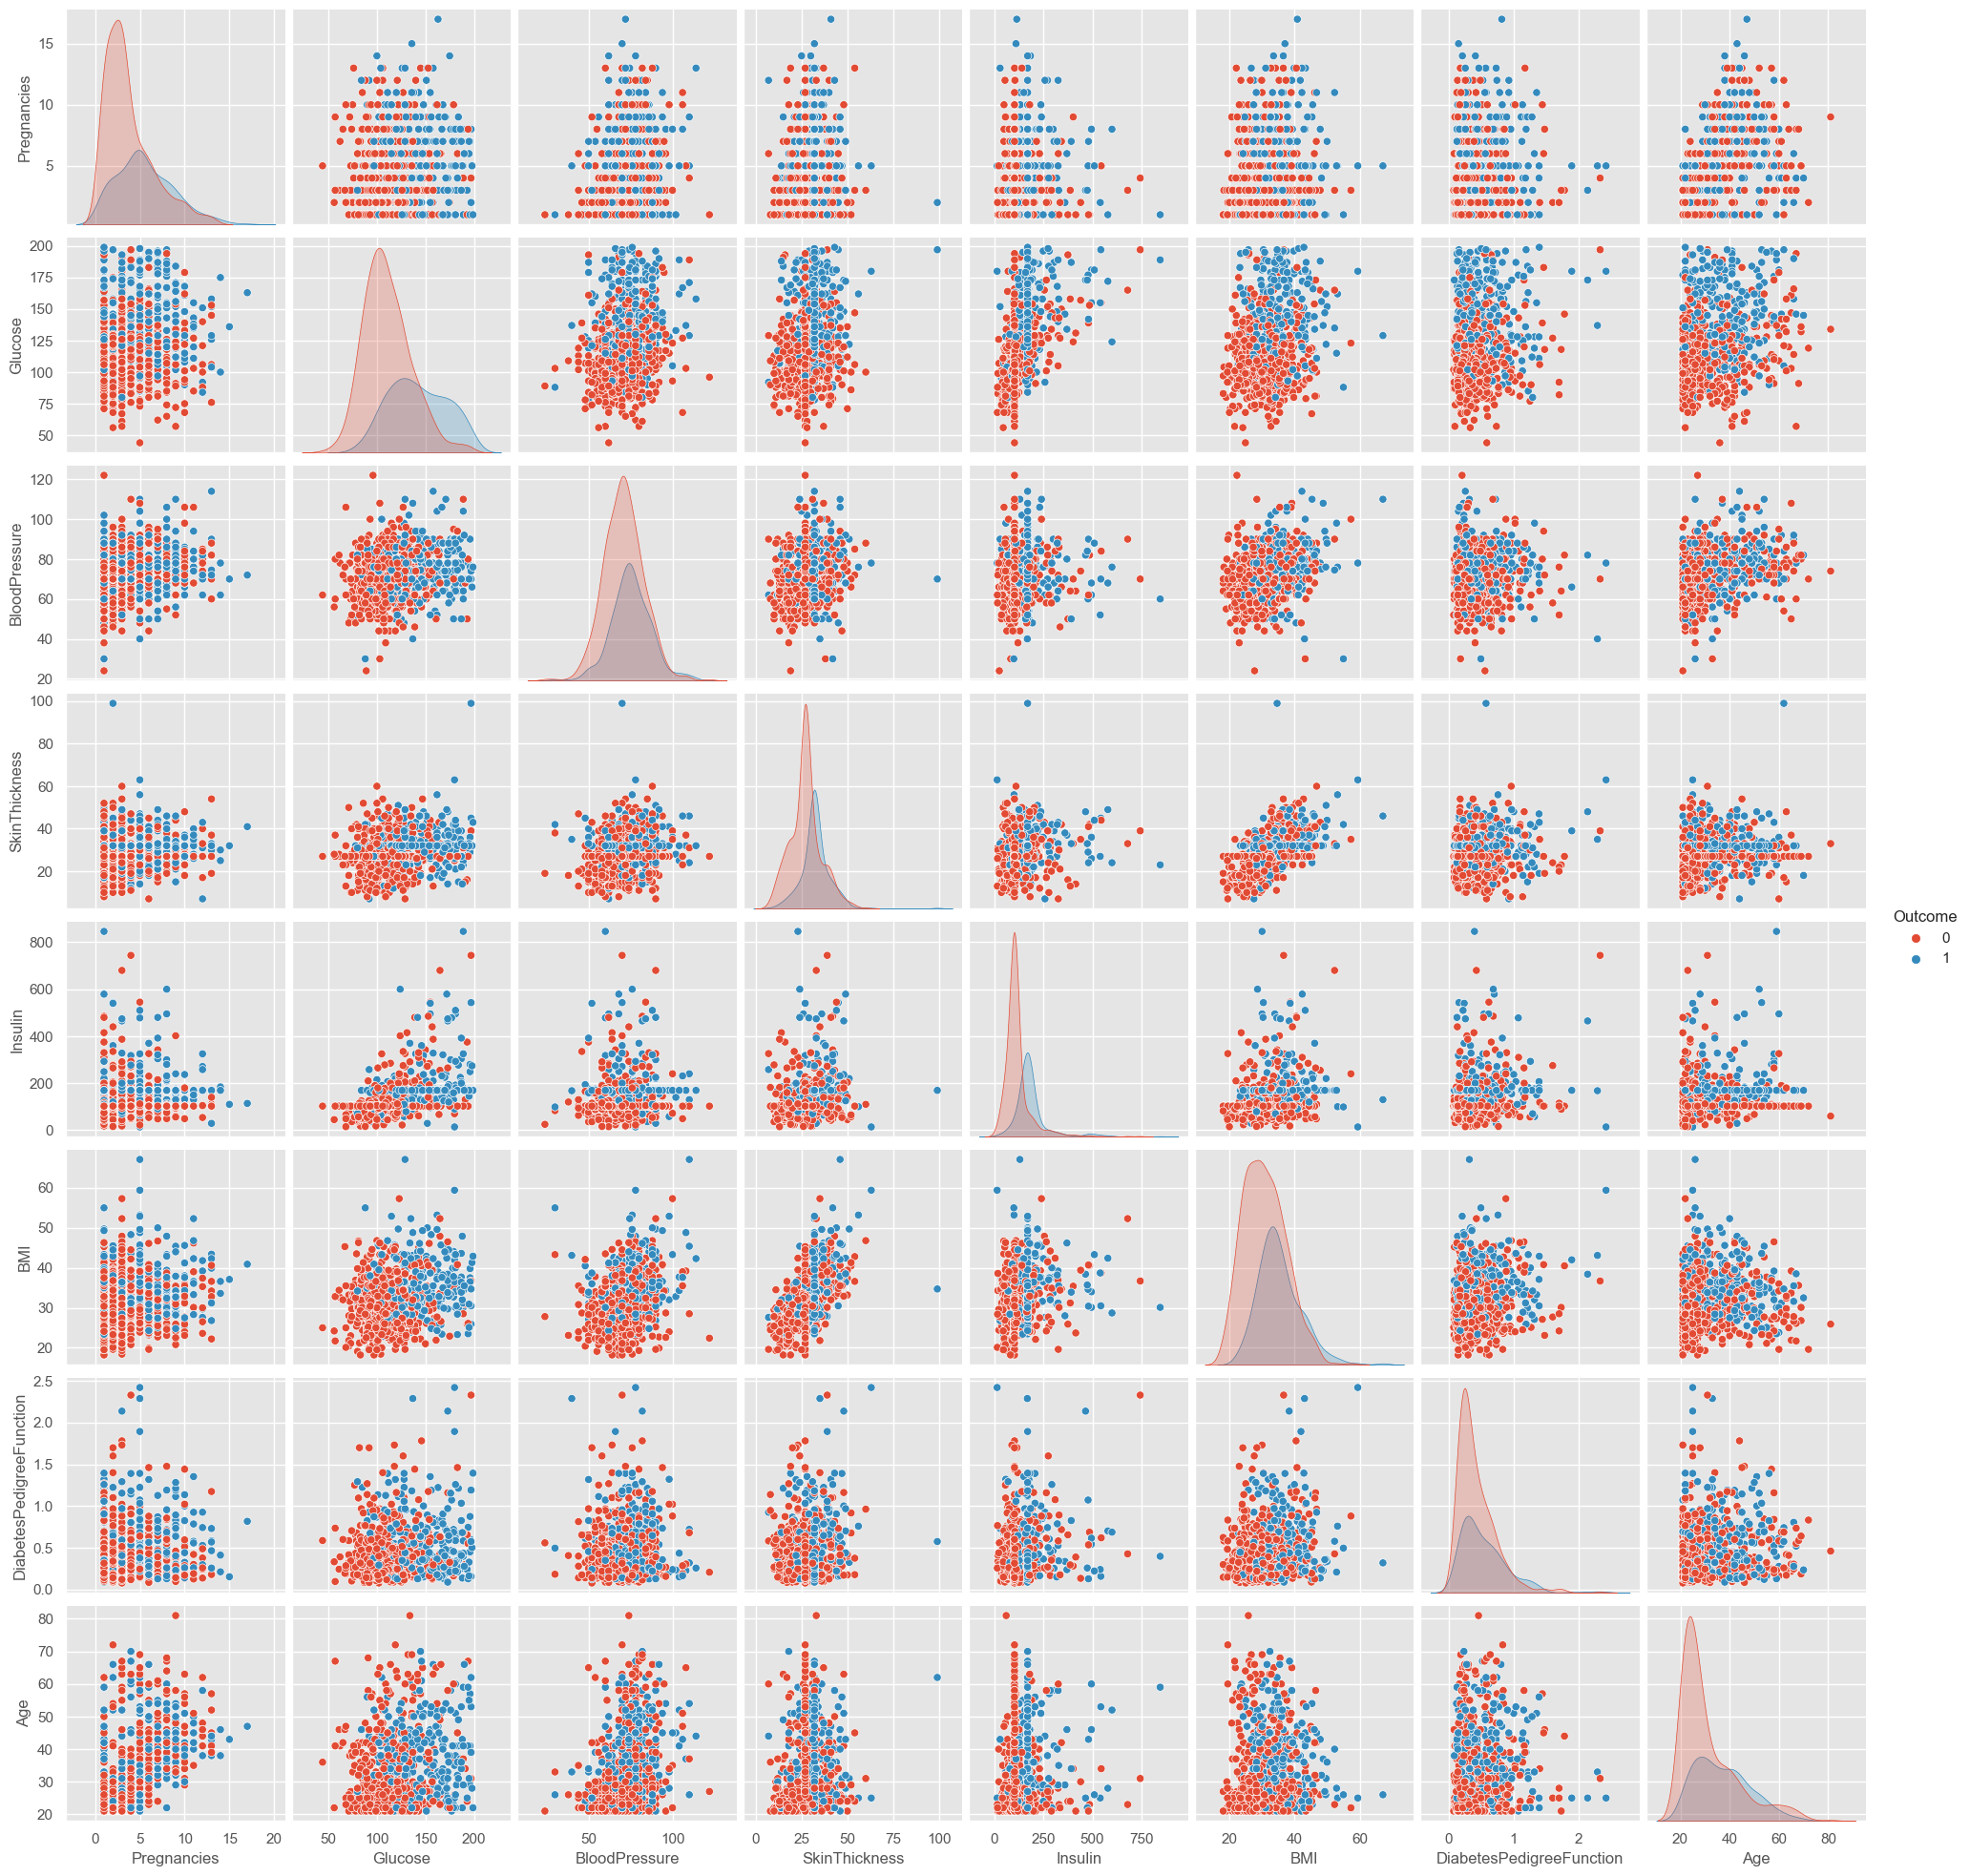

In [42]:
# pair plot
p = sns.pairplot(df, hue="Outcome")

In [43]:
# Outlier Detection
# IQR+Q1
# 50%
# 24.65->25%+50%
# 24.65->25%
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


<Axes: xlabel='Insulin'>

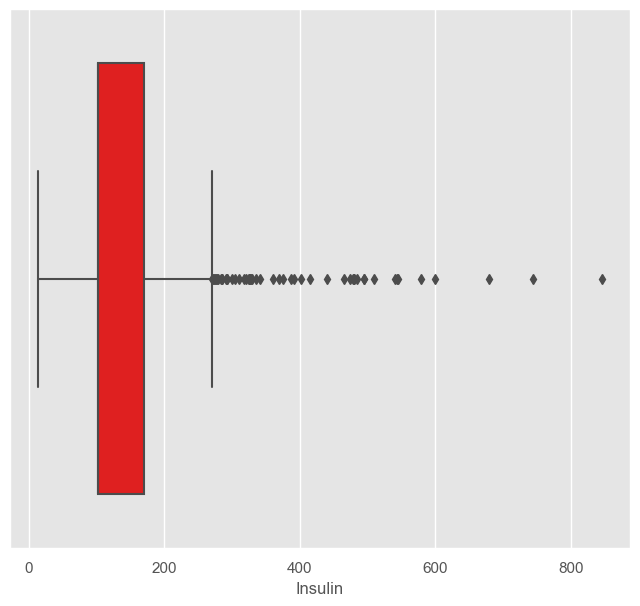

In [44]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"], color="red")

In [45]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Insulin']>upper, "Insulin"] = upper

<Axes: xlabel='Insulin'>

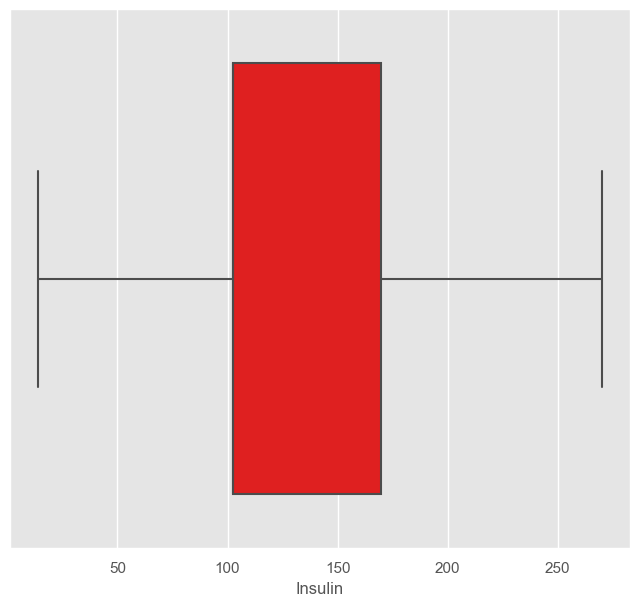

In [46]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"], color="red")

In [47]:
# LOF
# local outlier factor
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [48]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<Axes: xlabel='Pregnancies'>

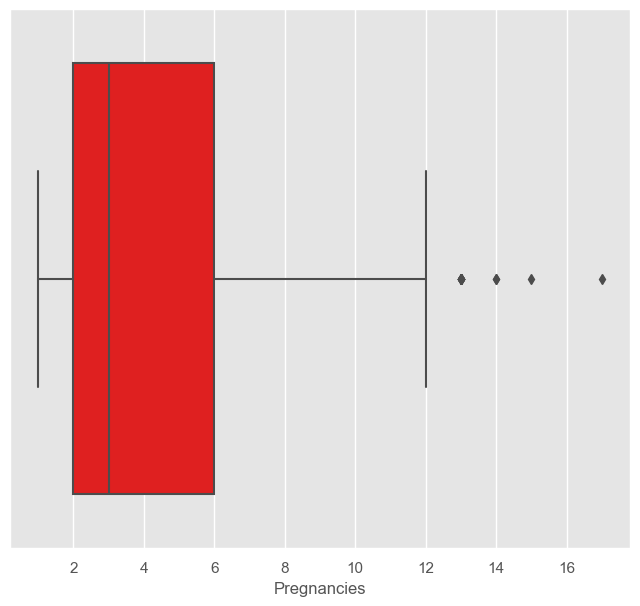

In [49]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Pregnancies"], color="red")

In [50]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:20]

array([-3.06509976, -2.38250393, -2.15557018, -2.11501347, -2.08356175,
       -1.95386655, -1.83559384, -1.74974237, -1.7330214 , -1.71017168,
       -1.70215105, -1.68722889, -1.64294601, -1.64180205, -1.61181746,
       -1.61067772, -1.60925053, -1.60214364, -1.59998552, -1.58761193])

In [51]:
thresold = np.sort(df_scores)[7]

In [52]:
thresold

-1.7497423670960557

In [53]:
outlier = df_scores>thresold

In [54]:
df = df[outlier]

In [55]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [56]:
df.shape

(760, 9)

<Axes: xlabel='Pregnancies'>

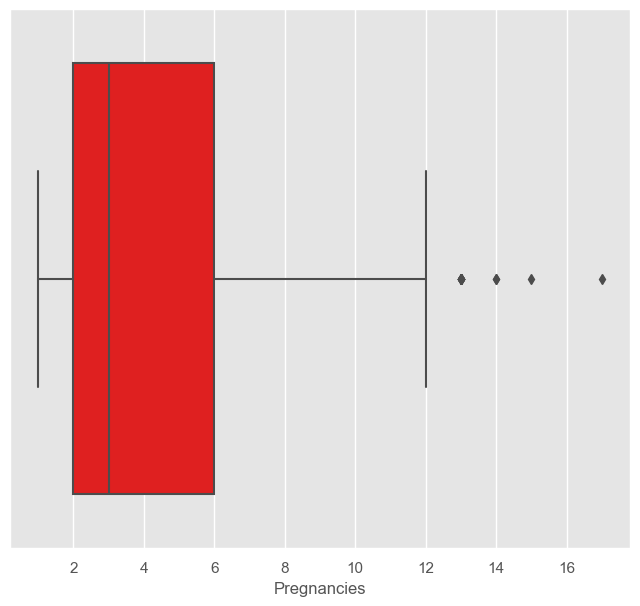

In [57]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Pregnancies"], color="red")

In [58]:
# Feature Enginnering
NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

In [59]:
NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight', 'Underweight']

In [60]:
df['NewBMI'] = NewBMI
df.loc[df["BMI"]<18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"]>18.5) & df["BMI"]<=24.9, "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"]>24.9) & df["BMI"]<=29.9, "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"]>29.9) & df["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"]>34.9) & df["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
df.loc[df["BMI"]>39.9, "NewBMI"] = NewBMI[5]

In [61]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [62]:
# if insulin>=16 & insuline<=166->normal
def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

In [63]:
df = df.assign(NewInsulinScore=df.apply(set_insuline, axis=1))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2,Abnormal
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2,Abnormal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [64]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2,Abnormal,Secret
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2,Normal,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2,Abnormal,Secret
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2,Normal,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


In [65]:
# One hot encoding
df = pd.get_dummies(df, columns = ["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,False,True,False,False,False,False,False,False,False,True
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,False,True,False,False,False,True,False,True,False,False
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,False,True,False,False,False,False,False,False,False,True
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False,True,False,False,False,True,False,True,False,False
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,False,False,True,False,False,False,False,False,False,True


In [66]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [67]:
categorical_df = df[['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,False,True,False,False,False,False,False,False,False,True
1,False,True,False,False,False,True,False,True,False,False
2,False,True,False,False,False,False,False,False,False,True
3,False,True,False,False,False,True,False,True,False,False
4,False,False,True,False,False,False,False,False,False,True


In [68]:
y=df['Outcome']
X=df.drop(['Outcome','NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis=1)
cols = X.columns
index = X.index
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [69]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X=transformer.transform(X)
X=pd.DataFrame(X, columns = cols, index = index)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.75,0.775,0.000,1.000000,1.000000,0.177778,0.669707,1.235294
1,-0.50,-0.800,-0.375,0.142857,0.000000,-0.600000,-0.049511,0.117647
2,1.25,1.650,-0.500,0.571429,1.000000,-0.966667,0.786971,0.176471
3,-0.50,-0.700,-0.375,-0.714286,-0.126866,-0.433333,-0.528990,-0.470588
4,0.50,0.500,-2.000,1.000000,0.977612,1.233333,4.998046,0.235294


In [70]:
X = pd.concat([X, categorical_df], axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.75,0.775,0.000,1.000000,1.000000,0.177778,0.669707,1.235294,False,True,False,False,False,False,False,False,False,True
1,-0.50,-0.800,-0.375,0.142857,0.000000,-0.600000,-0.049511,0.117647,False,True,False,False,False,True,False,True,False,False
2,1.25,1.650,-0.500,0.571429,1.000000,-0.966667,0.786971,0.176471,False,True,False,False,False,False,False,False,False,True
3,-0.50,-0.700,-0.375,-0.714286,-0.126866,-0.433333,-0.528990,-0.470588,False,True,False,False,False,True,False,True,False,False
4,0.50,0.500,-2.000,1.000000,0.977612,1.233333,4.998046,0.235294,False,False,True,False,False,False,False,False,False,True


In [72]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Machine Learning Algorithms

# Logistic Regreesion

In [74]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [75]:
y_pred = log_reg.predict(X_test)
accuracy_score(y_train, log_reg.predict(X_train))

0.8470394736842105

In [76]:
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
confusion_matrix(y_test, y_pred)

array([[88, 10],
       [ 6, 48]], dtype=int64)

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        98
           1       0.83      0.89      0.86        54

    accuracy                           0.89       152
   macro avg       0.88      0.89      0.89       152
weighted avg       0.90      0.89      0.90       152



# KNN

In [78]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(accuracy_score(y_test, knn.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.875
0.881578947368421
[[88 10]
 [ 8 46]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        98
           1       0.82      0.85      0.84        54

    accuracy                           0.88       152
   macro avg       0.87      0.87      0.87       152
weighted avg       0.88      0.88      0.88       152



# SVM

In [79]:
svc = SVC(probability=True)
parameter = {
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05,0.5, 0.01, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameter)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [81]:
# best_parameter
grid_search.best_params_

{'C': 10, 'gamma': 0.01}

In [82]:
grid_search.best_score_

0.8618208914781196

In [83]:
svc = SVC(C=10, gamma = 0.01, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(accuracy_score(y_test, svc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.875
0.9078947368421053
[[90  8]
 [ 6 48]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        98
           1       0.86      0.89      0.87        54

    accuracy                           0.91       152
   macro avg       0.90      0.90      0.90       152
weighted avg       0.91      0.91      0.91       152



# Decision Tree

In [84]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))

print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.8618421052631579
[[84 14]
 [ 7 47]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        98
           1       0.77      0.87      0.82        54

    accuracy                           0.86       152
   macro avg       0.85      0.86      0.85       152
weighted avg       0.87      0.86      0.86       152



In [85]:
# hyperparameter tuning of dt
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best','radom'],
    'min_samples_leaf':[1,2,3,5,7], 
    'min_samples_split':[1,2,3,5,7], 
    'max_features':['auto','sqrt','log2']
}
grid_search_dt = GridSearchCV(DT, grid_param, cv=50, n_jobs=-1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 50 folds for each of 1200 candidates, totalling 60000 fits


GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'radom']},
             verbose=1)

In [86]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'splitter': 'best'}

In [87]:
grid_search_dt.best_score_

0.8730769230769231

In [88]:
DT = grid_search_dt.best_estimator_
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))
dt_acc = accuracy_score(y_test, DT.predict(X_test))
print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.90625
0.8618421052631579
[[87 11]
 [10 44]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89        98
           1       0.80      0.81      0.81        54

    accuracy                           0.86       152
   macro avg       0.85      0.85      0.85       152
weighted avg       0.86      0.86      0.86       152



In [89]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [91]:
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [90]:
y_pred = rand_clf.predict(X_test)
y_pred = rand_clf.predict(X_test)
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(accuracy_score(y_test, rand_clf.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9901315789473685
0.9078947368421053
[[90  8]
 [ 6 48]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        98
           1       0.86      0.89      0.87        54

    accuracy                           0.91       152
   macro avg       0.90      0.90      0.90       152
weighted avg       0.91      0.91      0.91       152



In [92]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 150}

In [93]:
grid_search_gbc.best_score_

0.888032786885246

In [94]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 150)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=150)

In [95]:
gbc = grid_search_gbc.best_estimator_
y_pred = gbc.predict(X_test)
print(accuracy_score(y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(accuracy_score(y_test, gbc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9983552631578947
0.9144736842105263
[[91  7]
 [ 6 48]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        98
           1       0.87      0.89      0.88        54

    accuracy                           0.91       152
   macro avg       0.91      0.91      0.91       152
weighted avg       0.91      0.91      0.91       152



In [ ]:
# Model Comparison
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dt_acc,4), 100*round(rand_acc,4), 
              100*round(gbc_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

In [98]:
import pickle
model = gbc_acc
pickle.dump(model, open("diabetes.pkl",'wb'))

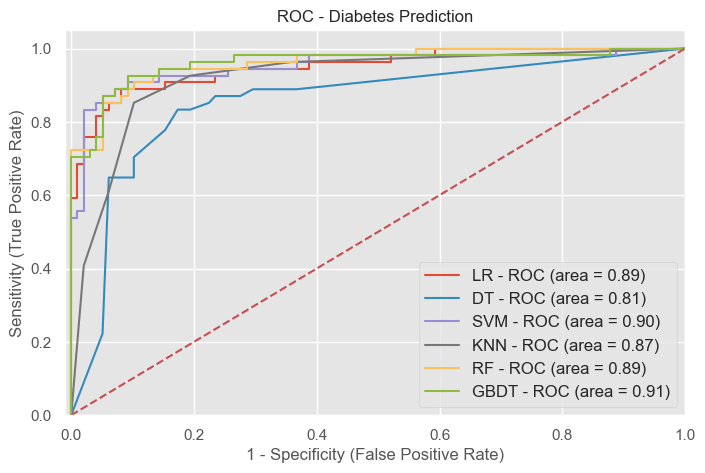

In [99]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': DT,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},

{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Diabetes Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

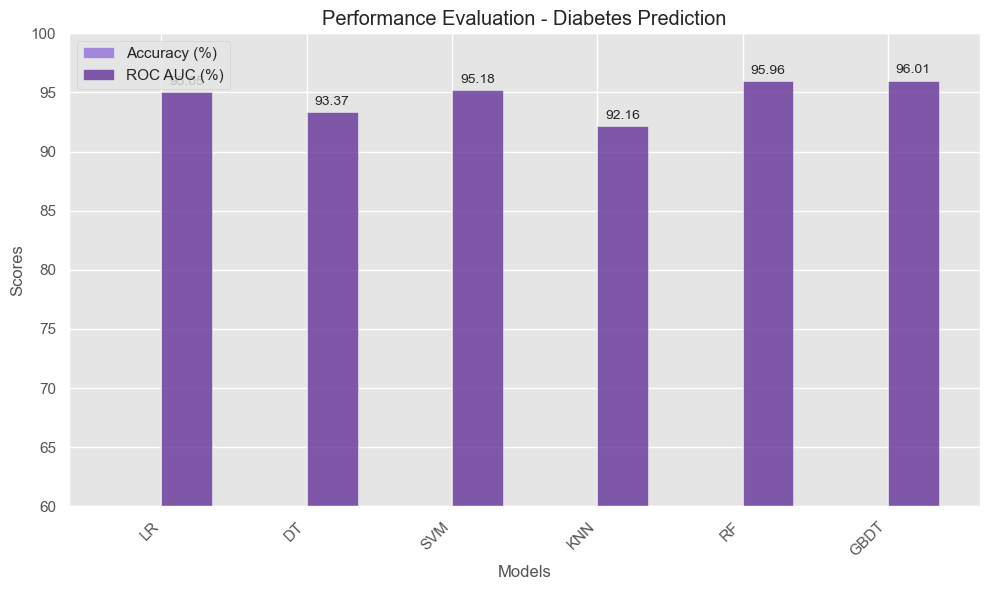

In [101]:
models = [
    {'label': 'LR', 'model': log_reg},
    {'label': 'DT', 'model': DT},
    {'label': 'SVM', 'model': svc},
    {'label': 'KNN', 'model': knn},
    {'label': 'RF', 'model': rand_clf},
    {'label': 'GBDT', 'model': gbc}
]

means_accuracy = [log_reg_acc, dt_acc, svc_acc, knn_acc,rand_acc, gbc_acc]
means_roc = []

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    means_roc.append(100 * round(auc, 4))

# Data to plot
n_groups = len(models)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(index, means_accuracy, bar_width,
                alpha=opacity,
                color='mediumpurple',
                label='Accuracy (%)')

rects2 = ax.bar(index + bar_width, means_roc, bar_width,
                alpha=opacity,
                color='rebeccapurple',
                label='ROC AUC (%)')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Evaluation - Diabetes Prediction')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([m['label'] for m in models])
ax.legend()

plt.ylim([60, 100])  # Adjust the y-axis limits if necessary

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate('%.2f' % height,
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()

# Save the plot as JPEG image
plt.savefig("PE_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')

plt.show()
